## 2. Aprendizagem de máquina

### Objetivos

  - Apresentar e praticar conceitos de aprendizado não supervisionado
  - Compreender o conceito de cluster
  - Apresentar os algoritimos KMeans, DBScan e GaussianMixture

## Métodos de agrupamento


Uma das técnicas de aprendizagem não supervisionada é o **agrupamento automático de dados** ou **clusterização**. 

**Lembre-se:** Em aprendizagem não supervissionada, o nosso conjunto de dados para treino não possui label. 

Essa técnica classifica os dados em conjuntos que apresentam alguma similaridade (distância das observações). Os grupos gerados nesse processo são chamados de `clusters`.

## Desafio 1 

Acesse o link e realize o cadastro com email `FIAP` e bora fazer a atividade: https://miro.com/app/board/o9J_l2e1B1U=/


## K-Means

O K-Means é SIMPLE por isso é um dos metodos de clusterização mais "clásicos" e recebe esse nome pois encontra uma quantidade `K de clusters`, sendo K um parâmetro para o modelo e para cada cluster é atribuído um centro chamado de `centroide`. Tambem conhecido método de partição sem sobreposição.

### Curiosidades

Esse algoritimo está entre os top 10 algoritimos de mineração de dados (data mining)

É um algoritimo utilizado a mais de 70 anos, existe papers das decadas de 50 e 60 que falam sobre ele.  

### Algoritmo K-Means

O algoritimo K-Means trata-se de um método iterativo e pode ser definido em 4 etapas, são elas:

1) Escolher aleatoriamente k protótipos (centros) para os clusters

2) Atribuir cada objeto para o cluster de centro mais próximo (segundo alguma distância, e.g. Euclidiana)

3) Mover cada centro para a média (centróide) dos objetos do cluster correspondente

4) Repetir os passos 2 e 3 até que algum critério de convergência seja obtido:

- número máximo de iterações
- limiar mínimo de mudanças nos centróides


## Vantagens e Desvantagens


### Vantagens

 * Simples e intuitivo
 * Complexidade computacional linear em todas as variáveis críticas
 * Eficaz em muitos cenários de aplicação e produz resultados de interpretação simples
 

### Desvantagens
 * k = ?
 * Sensível à inicialização dos protótipos (mínimos locais)
 * Limita-se a encontrar clusters volumétricos / globulares
 * Cada item deve pertencer a um único cluster (partição rígida, ou seja, sem sobreposição)
 * Limitado a atributos numéricos
 * Sensível a outliers


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

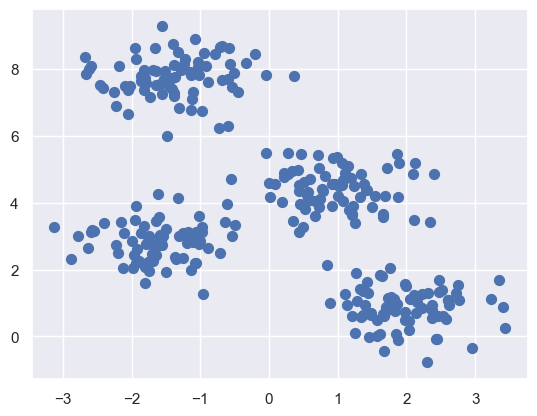

In [3]:
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [4]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

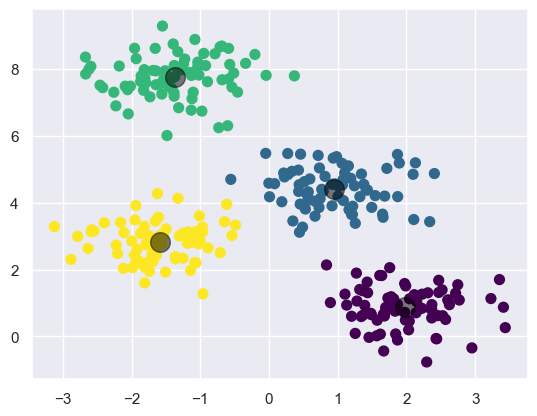

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

## Desafio 2

Pergunta: E como descobrir o número de k?


dica: Busque por referências como o método do cotovelo ou elbow...


In [ ]:
## sua resposta...

### Selecionando o Número Ótimo de Clusters com o Método do Cotovelo

O método do cotovelo ajuda a escolher o número ideal de clusters, plotando a inércia contra o número de clusters. Quando o gráfico começa a "dobrar", é um bom indicativo de que o número de clusters adequado foi atingido.

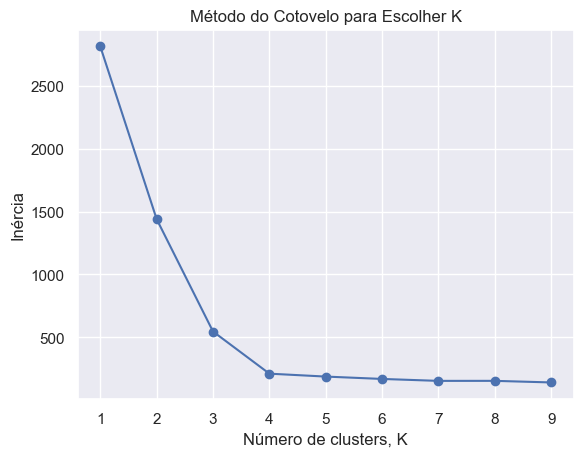

In [6]:
inertias = []
K = range(1, 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Plotando o gráfico
plt.plot(K, inertias, 'bo-')
plt.xlabel('Número de clusters, K')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo para Escolher K')
plt.show()


## Adicionar os Clusters ao Dataset

Para adicionar os clusters encontrados pelo algoritmo K-means como uma nova coluna no dataset, podemos usar o pacote Pandas para manipular os dados de forma organizada. 

Passos para Adicionar os Clusters ao Dataset:

- Usaremos Pandas para criar um DataFrame com os dados originais.
- Adicionaremos a coluna clusters com os valores gerados pelo K-means.

In [14]:
import pandas as pd

from sklearn.cluster import KMeans

k_otimo = 4 # Definindo o número ótimo de clusters

kmeans = KMeans(n_clusters=k_otimo)

kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Criando um DataFrame a partir dos dados gerados
df = pd.DataFrame(X, columns=['Feature 1', 'Feature 2'])

# Adicionando a coluna de clusters ao DataFrame
df['Cluster'] = y_kmeans

# Exibindo as primeiras linhas do DataFrame para visualização
df.head()


,Feature 1,Feature 2,Cluster
0,0.836857,2.136359,0
1,-1.413658,7.409623,2
2,1.155213,5.099619,1
3,-1.018616,7.814915,2
4,1.271351,1.892542,0
